In [1]:
from twopoint_configuration import *

Using CAMB 1.1.3 installed at /global/homes/n/nishant/.conda/envs/cobaya/lib/python3.8/site-packages/camb


In [2]:
Fiducial = Universe()
Fiducial.runCAMB()
DESY1 = Kernels(Fiducial)
filename = 'map_prediction_chain_2x2pt_fixedcosmo_free_mag_pm_samp_buzzard_mean_dv_16_sompz_bin_zs_true_true_zl_no_sn_no_jk_20xrand_bNGcov.fits_scales_3x2pt_0.5_8_6_v0.4.ini_lcdm_scaledrsd.txt'
DESY1.loadDES_nzs(filename)

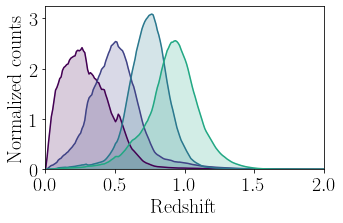

<Figure size 432x288 with 0 Axes>

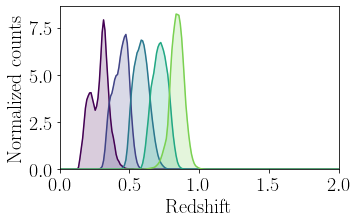

<Figure size 432x288 with 0 Axes>

In [3]:
DESY1.plot_source_nzs()
DESY1.plot_lens_nzs()

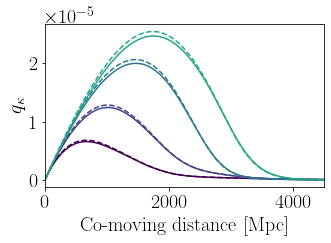

<Figure size 432x288 with 0 Axes>

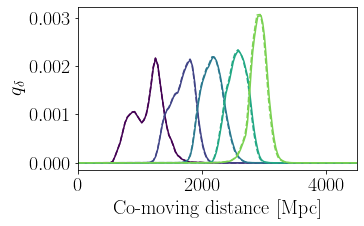

<Figure size 432x288 with 0 Axes>

In [4]:
DESY1.source_kernel(ia=False)
DESY1.lens_kernel()

DESY1.plot_source_kernels()
DESY1.plot_lens_kernels()

In [5]:
#b1, b2, bs2, bnabla2, SN
Fiducial.set_biasParams_Anzu(0.7, 0, 0, 0 ,0)

wave_density = 100
k_range = np.logspace(-10,-0.177, wave_density)

z, (Pmm, Pgg, Pmg) = Fiducial.genPowerSpectrum(k_range)
z, (Pmm, Pgg, Pmg) = Fiducial.extrapolatePowerSpectrum(1000)

(199, 401)


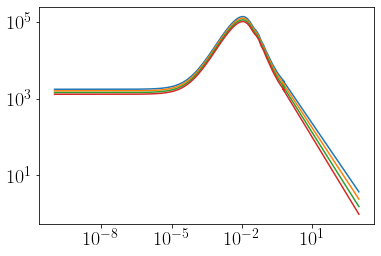

In [6]:
print(Fiducial.Pmm.shape)

plt.plot(Fiducial.k_range, Fiducial.Pmg[:, 0])
plt.plot(Fiducial.k_range, Fiducial.Pmg[:, 10])
plt.plot(Fiducial.k_range, Fiducial.Pmg[:, 20])
plt.plot(Fiducial.k_range, Fiducial.Pmg[:, 30])

plt.xscale('log')
plt.yscale('log')


In [7]:
TwoPointHarmonicDESY1 = TwoPointHarmonic(DESY1, lmax=100000)

TwoPointHarmonicDESY1_test = TwoPointHarmonic(DESY1, lmax=100000)

start = time.time()

C_kk = TwoPointHarmonicDESY1.genC_kk()
C_dk = TwoPointHarmonicDESY1.genC_dk()
C_dd = TwoPointHarmonicDESY1.genC_dd()

C_kk_test = TwoPointHarmonicDESY1_test.genC_kk()
C_dk_test = TwoPointHarmonicDESY1_test.genC_dk()
C_dd_test = TwoPointHarmonicDESY1_test.genC_dd()

end = time.time()

print(end-start)
print(C_kk.shape)
print(C_dk.shape)
print(C_dd.shape)

8.286623477935791
(4, 4, 3000)
(5, 4, 3000)
(5, 5, 3000)


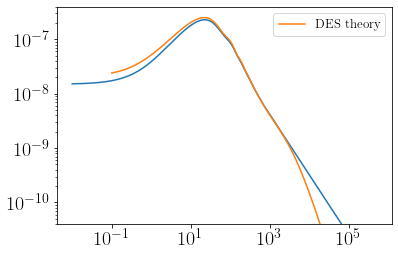

100000.0
499999.99999999994


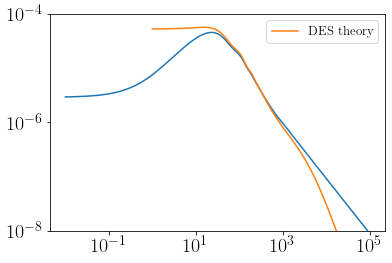

In [8]:
ell_test = np.loadtxt('ell.txt')
bin_3_3_test = np.loadtxt('bin_3_3.txt')
R=0.00004

plt.plot(TwoPointHarmonicDESY1.ells, C_dk[2,2,:])# * np.exp(-TwoPointHarmonicDESY1.ells**2 * R**2))
plt.plot(ell_test, bin_3_3_test, label='DES theory')
plt.ylim(4e-11, 4e-7)
#plt.xlim(1,000)
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.show()

print(max(TwoPointHarmonicDESY1.ells))
print(max(ell_test))
f = interp.interp1d(ell_test, bin_3_3_test, fill_value=bin_3_3_test[0], bounds_error=False)

#rewriting our test object with the data from Joe
C_dk_test = f(TwoPointHarmonicDESY1_test.ells)
TwoPointHarmonicDESY1_test.C_dk[2,2,:] = C_dk_test


ell_test = np.loadtxt('ell_gg.txt')
bin_3_3_test = np.loadtxt('bin_3_3_gg.txt')

plt.plot(TwoPointHarmonicDESY1.ells, C_dd[2,2,:])# * np.exp(-TwoPointHarmonicDESY1.ells**2 * R**2))
plt.plot(ell_test, bin_3_3_test, label='DES theory')



#plt.xlim(1,000)
plt.ylim(1e-8, 1e-4)
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.show()

In [9]:
TwoPointConfigurationDESY1 = TwoPointConfiguration(TwoPointHarmonicDESY1, (200*np.pi/(60*180)), 100)
TwoPointConfigurationDESY1_test = TwoPointConfiguration(TwoPointHarmonicDESY1_test, (200*np.pi/(60*180)), 100)

In [10]:
P_ell_matrix = TwoPointConfigurationDESY1.gen_P_ell(load_matrix=True)
P2_ell_matrix = TwoPointConfigurationDESY1.gen_P2_ell(load_matrix=True)

Gp_ell_matrix, Gm_ell_matrix = TwoPointConfigurationDESY1.gen_G_ell()

P_ell_matrix_test = TwoPointConfigurationDESY1_test.gen_P_ell(load_matrix=True)
P2_ell_matrix_test = TwoPointConfigurationDESY1_test.gen_P2_ell(load_matrix=True)

Gp_ell_matrix_test, Gm_ell_matrix_test = TwoPointConfigurationDESY1_test.gen_G_ell()

In [11]:
w = TwoPointConfigurationDESY1.gen_wtheta(R=0.0005, shot_noise=0)
w_test = TwoPointConfigurationDESY1_test.gen_wtheta(R=0.0005, shot_noise=0)

xip, xim = TwoPointConfigurationDESY1.gen_xi(R=0.0005, shot_noise=0)
gammat = TwoPointConfigurationDESY1.gen_gammat(R=0.0005, shot_noise=0)
gammat_test = TwoPointConfigurationDESY1_test.gen_gammat(R=0.0005, shot_noise=0)

xip


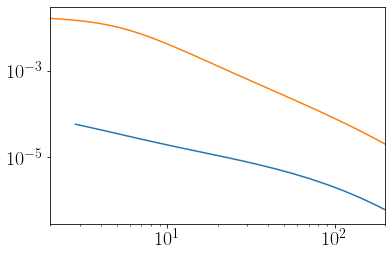

xim


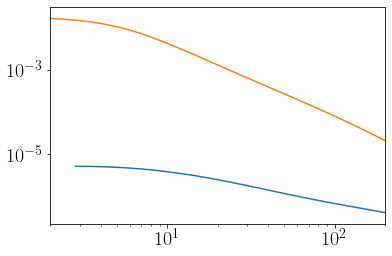

gammat


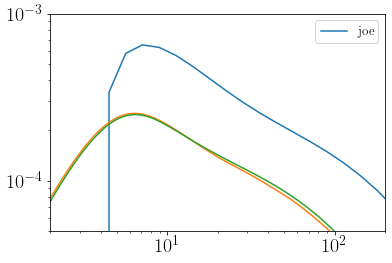

wtheta


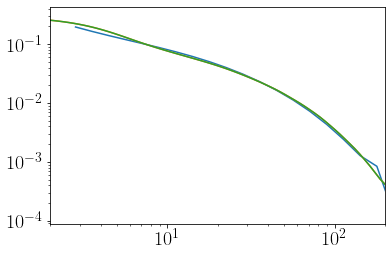

In [12]:
plt.xscale('log')
plt.yscale('log')

filename1 = 'map_prediction_chain_2x2pt_fixedcosmo_free_mag_pm_samp_buzzard_mean_dv_16_sompz_bin_zs_true_true_zl_no_sn_no_jk_20xrand_bNGcov.fits_scales_3x2pt_0.5_8_6_v0.4.ini_lcdm_scaledrsd.txt'


test = fits.open(filename1 +'.fits')

T1 = twopoint.TwoPointFile.from_fits(filename1 + '.fits')
print(T1)

for spectra in T1.spectra:
    print(spectra.name)
    if spectra.name == 'wtheta':
        i,j = spectra.bin_pairs[3]
        theta, wtheta = spectra.get_pair(i,j)
        plt.xscale('log')
        plt.yscale('log')
        plt.plot(theta, wtheta, label='joe')
        plt.plot(TwoPointConfigurationDESY1.theta_range*60*180/np.pi, w[2,:])
        plt.plot(TwoPointConfigurationDESY1_test.theta_range*60*180/np.pi, w_test[2,:])
        plt.xlim(2,200)
        plt.show()
    if spectra.name == 'xip':
        i,j = spectra.bin_pairs[7]
        theta, wtheta = spectra.get_pair(i,j)
        plt.xscale('log')
        plt.yscale('log')
        plt.plot(theta, wtheta, label='joe')
        plt.plot(TwoPointConfigurationDESY1.theta_range*60*180/np.pi, xip[2,2,:])
        plt.xlim(2,200)
        plt.show()
    if spectra.name == 'xim':
        i,j = spectra.bin_pairs[3]
        theta, wtheta = spectra.get_pair(i,j)
        plt.xscale('log')
        plt.yscale('log')
        plt.plot(theta, wtheta, label='joe')
        plt.plot(TwoPointConfigurationDESY1.theta_range*60*180/np.pi, xim[2,2,:])
        plt.xlim(2,200)
        plt.show()

    if spectra.name == 'gammat':
        i,j = spectra.bin_pairs[3]
        theta, wtheta = spectra.get_pair(i,j)
        plt.xscale('log')
        plt.yscale('log')
        plt.plot(theta, wtheta, label='joe')
        plt.plot(TwoPointConfigurationDESY1.theta_range*60*180/np.pi, gammat[2,2,:])
        plt.plot(TwoPointConfigurationDESY1_test.theta_range*60*180/np.pi, gammat_test[2,2,:])
        plt.xlim(2,200)
        plt.ylim(5e-5, 1e-3)
        plt.legend()
        plt.show()
        #plt.plot(TwoPointConfigurationDESY1.theta_range*60*180/np.pi, w_test)
        #plt.xlim(2,200)

Error-scaling tests

In [ ]:
Fiducial = Universe()
Fiducial.runCAMB()
DESY1 = Kernels(Fiducial)
filename = 'map_prediction_chain_2x2pt_fixedcosmo_free_mag_pm_samp_buzzard_mean_dv_16_sompz_bin_zs_true_true_zl_no_sn_no_jk_20xrand_bNGcov.fits_scales_3x2pt_0.5_8_6_v0.4.ini_lcdm_scaledrsd.txt'
DESY1.loadDES_nzs(filename)

DESY1.source_kernel(ia=False)
DESY1.lens_kernel()

In [ ]:
Fiducial.set_biasParams_Anzu(0.7, 0, 0, 0 ,0)

wave_density = 1000
k_range = np.logspace(-10,-0.177, wave_density)

z, (Pmm, Pgg, Pmg) = Fiducial.genPowerSpectrum(k_range)
z, (Pmm, Pgg, Pmg) = Fiducial.extrapolatePowerSpectrum(1000)

In [ ]:
TwoPointHarmonicDESY1 = TwoPointHarmonic(DESY1, lmax=10000)
TwoPointConfigurationDESY1 = TwoPointConfiguration(TwoPointHarmonicDESY1, (200*np.pi/(60*180)), 2000)
P_ell_matrix = TwoPointConfigurationDESY1.gen_P_ell(load_matrix=True)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(23, 5), gridspec_kw={'height_ratios': [3,1]})

C_dd = TwoPointHarmonicDESY1.genC_dd()
w = TwoPointConfigurationDESY1.gen_wtheta(R=0.0005, shot_noise=0)

axs[0,0].plot(Fiducial.k_range, Pgg[:, 30], label='A = 0' + ", n = 2")
axs[0,1].plot(TwoPointHarmonicDESY1.ells, C_dd[2,2,:], label='A = 0' + ", n = 2")
axs[0,2].plot(TwoPointConfigurationDESY1.theta_range*60*180/np.pi, w[2,:], label='A = 0' + ", n = 2")

for A in [1e-9,1e-8,1e-7]:
    z, (Pmm_n, Pgg_n, Pmg_n) = Fiducial.addNoisePowerSpectrum(A=A)
    C_dd_noised = TwoPointHarmonicDESY1.genC_dd()
    TwoPointConfigurationDESY1 = TwoPointConfiguration(TwoPointHarmonicDESY1, (200*np.pi/(60*180)), 2000)
    P_ell_matrix = TwoPointConfigurationDESY1.gen_P_ell(load_matrix=True)
    w2 = TwoPointConfigurationDESY1.gen_wtheta(R=0.0005, shot_noise=0)

    axs[0,0].plot(Fiducial.k_range, Pgg_n[:, 30], label='A = ' + str(A) + ", n = 2")
    axs[0,1].plot(TwoPointHarmonicDESY1.ells, C_dd_noised[2,2,:], label='A = ' + str(A) + ", n = 2")
    axs[0,2].plot(TwoPointConfigurationDESY1.theta_range*60*180/np.pi, w2[2,:])
    
    axs[1,0].plot(Fiducial.k_range, (Pgg_n[:, 30] - Pgg[:, 30])/Pgg[:, 30] , label='A = ' + str(A) + ", n = 2")
    axs[1,1].plot(TwoPointHarmonicDESY1.ells, (C_dd_noised[2,2,:] - C_dd[2,2,:])/C_dd[2,2,:], label='A = ' + str(A) + ", n = 2")
    axs[1,2].plot(TwoPointConfigurationDESY1.theta_range*60*180/np.pi, (w2[2,:] - w[2,:])/w[2,:])
    
    Fiducial.addNoisePowerSpectrum(A=-1*A)

axs[0,0].set_title("$P_{fid}(k) + A k^n$")
axs[0,0].set_xscale('log')
axs[0,0].set_yscale('log')

axs[0,1].set_xscale('log')
axs[0,1].set_yscale('log')

axs[0,2].set_xscale('log')
axs[0,2].set_yscale('log')

axs[1,0].set_xscale('log')
#axs[1,0].set_yscale('log')

axs[1,1].set_xscale('log')
#axs[1,1].set_yscale('log')

axs[1,2].set_xscale('log')
#axs[1,2].set_yscale('log')


axs[0,0].legend()
axs[0,1].legend()

axs[0,0].set_ylim(1e2, 1e6)
axs[0,0].set_xlim(1e-5, 1e4)

axs[0,1].set_ylim(1e-7, 1e-4)
axs[0,1].set_xlim(0, 10000)

axs[0,0].set_ylabel('$P(k)$')
axs[0,0].set_xlabel('$k$')

axs[0,1].set_ylabel('$C_l$')
axs[0,1].set_xlabel('$l$')

axs[0,2].set_ylabel(r'$w_\theta$')
axs[0,2].set_xlabel(r'$\theta$')

plt.show()

"""fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(22, 5))

for n in range(6):
    z, (Pmm_n, Pgg_n, Pmg_n) = Fiducial.addNoisePowerSpectrum(A=10, n=n)
    C_dd_noised = TwoPointHarmonicDESY1.genC_dd()
    TwoPointConfigurationDESY1 = TwoPointConfiguration(TwoPointHarmonicDESY1, (200*np.pi/(60*180)), 2000)
    P_ell_matrix = TwoPointConfigurationDESY1.gen_P_ell(load_matrix=True)
    w2 = TwoPointConfigurationDESY1.gen_wtheta(R=0.0005, shot_noise=0)
    print(w2.shape)
    axs[0].plot(Fiducial.k_range, Pgg_n[:, 30], label='A = 10, n = ' + str(n))
    axs[1].plot(TwoPointHarmonicDESY1.ells, C_dd_noised[2,2,:], label='A = 10, n = ' + str(n))
    axs[2].plot(TwoPointConfigurationDESY1.theta_range*60*180/np.pi, w2[2,:])
    Fiducial.addNoisePowerSpectrum(A=-10, n=n)

    
axs[0].set_title("$P_{fid}(k) + A k^n$")

axs[0].set_xscale('log')
axs[0].set_yscale('log')

axs[0].set_ylim(1e2, 1e6)
axs[0].set_xlim(1e-5, 1e4)

axs[1].set_xscale('log')
axs[1].set_yscale('log')

axs[2].set_xscale('log')
axs[2].set_yscale('log')

axs[1].set_ylim(1e-7, 1e-4)
axs[1].set_xlim(0, 10000)

axs[0].legend()
axs[1].legend()

axs[0].set_ylabel('$P(k)$')
axs[0].set_xlabel('$k$')

axs[1].set_ylabel('$C_l$')
axs[1].set_xlabel('$l$')
plt.show()"""

In [ ]:
TwoPointHarmonicDESY1 = TwoPointHarmonic(DESY1, lmax=10000)
TwoPointConfigurationDESY1 = TwoPointConfiguration(TwoPointHarmonicDESY1, (200*np.pi/(60*180)), 2000)
P_ell_matrix = TwoPointConfigurationDESY1.gen_P_ell(load_matrix=True)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(23, 5), gridspec_kw={'height_ratios': [3,1]})

C_dd = TwoPointHarmonicDESY1.genC_dd()
w = TwoPointConfigurationDESY1.gen_wtheta(R=0.0005, shot_noise=0)

axs[0,0].plot(Fiducial.k_range, Pgg[:, 30], label='A = 0' + ", n = 2")
axs[0,1].plot(TwoPointHarmonicDESY1.ells, C_dd[2,2,:], label='A = 0' + ", n = 2")
axs[0,2].plot(TwoPointConfigurationDESY1.theta_range*60*180/np.pi, w[2,:], label='A = 0' + ", n = 2")

axs[1,0].plot(Fiducial.k_range, (Pgg[:, 30] - Pgg[:, 30])/Pgg[:, 30] , label='A = ' + str(A) + ", n = 2")
axs[1,1].plot(TwoPointHarmonicDESY1.ells, (C_dd[2,2,:] - C_dd[2,2,:])/C_dd[2,2,:], label='A = ' + str(A) + ", n = 2")
axs[1,2].plot(TwoPointConfigurationDESY1.theta_range*60*180/np.pi, (w[2,:] - w[2,:])/w[2,:])

for A in [1e-3, 1e-2, 1e-1]:
    z, (Pmm_n, Pgg_n, Pmg_n) = Fiducial.multiplyNoisePowerSpectrum(A=A)
    C_dd_noised = TwoPointHarmonicDESY1.genC_dd()
    TwoPointConfigurationDESY1 = TwoPointConfiguration(TwoPointHarmonicDESY1, (200*np.pi/(60*180)), 2000)
    P_ell_matrix = TwoPointConfigurationDESY1.gen_P_ell(load_matrix=True)
    w2 = TwoPointConfigurationDESY1.gen_wtheta(R=0.0005, shot_noise=0)

    axs[0,0].plot(Fiducial.k_range, Pgg_n[:, 30], label='A = ' + str(A) + ", n = 2")
    axs[0,1].plot(TwoPointHarmonicDESY1.ells, C_dd_noised[2,2,:], label='A = ' + str(A) + ", n = 2")
    axs[0,2].plot(TwoPointConfigurationDESY1.theta_range*60*180/np.pi, w2[2,:])
    
    axs[1,0].plot(Fiducial.k_range, (Pgg_n[:, 30] - Pgg[:, 30])/Pgg[:, 30] , label='A = ' + str(A) + ", n = 2")
    axs[1,1].plot(TwoPointHarmonicDESY1.ells, (C_dd_noised[2,2,:] - C_dd[2,2,:])/C_dd[2,2,:], label='A = ' + str(A) + ", n = 2")
    axs[1,2].plot(TwoPointConfigurationDESY1.theta_range*60*180/np.pi, (w2[2,:] - w[2,:])/w[2,:])
    
    Fiducial.divideNoisePowerSpectrum(A=A)

axs[0,0].set_title("$P_{fid}(k)(1 + A k^n)$")
axs[0,0].set_xscale('log')
axs[0,0].set_yscale('log')

axs[0,1].set_xscale('log')
axs[0,1].set_yscale('log')

axs[0,2].set_xscale('log')
axs[0,2].set_yscale('log')

axs[1,0].set_xscale('log')
#axs[1,0].set_yscale('log')

axs[1,1].set_xscale('log')
#axs[1,1].set_yscale('log')

axs[1,2].set_xscale('log')
#axs[1,2].set_yscale('log')


axs[0,0].legend()
axs[0,1].legend()

axs[0,0].set_ylim(1e2, 1e6)
axs[0,0].set_xlim(1e-3, 1e1)

axs[1,0].set_xlim(1e-3, 1e1)
axs[1,0].set_ylim(-0.06, 0.06)

axs[0,1].set_ylim(1e-7, 1e-4)
axs[0,1].set_xlim(1, 10000)

axs[1,1].set_ylim(-0.005, 0.005)
axs[1,1].set_xlim(1, 10000)

axs[0,2].set_xlim(2, 200)

axs[1,2].set_xlim(2, 200)
axs[1,2].set_ylim(-0.02, 0.02)

axs[0,0].set_ylabel('$P(k)$')
axs[0,0].set_xlabel('$k$')

axs[0,1].set_ylabel('$C_l$')
axs[0,1].set_xlabel('$l$')

axs[0,2].set_ylabel(r'$w_\theta$')
axs[0,2].set_xlabel(r'$\theta$')

plt.show()

"""fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(22, 5))

for n in range(6):
    z, (Pmm_n, Pgg_n, Pmg_n) = Fiducial.addNoisePowerSpectrum(A=10, n=n)
    C_dd_noised = TwoPointHarmonicDESY1.genC_dd()
    TwoPointConfigurationDESY1 = TwoPointConfiguration(TwoPointHarmonicDESY1, (200*np.pi/(60*180)), 2000)
    P_ell_matrix = TwoPointConfigurationDESY1.gen_P_ell(load_matrix=True)
    w2 = TwoPointConfigurationDESY1.gen_wtheta(R=0.0005, shot_noise=0)
    print(w2.shape)
    axs[0].plot(Fiducial.k_range, Pgg_n[:, 30], label='A = 10, n = ' + str(n))
    axs[1].plot(TwoPointHarmonicDESY1.ells, C_dd_noised[2,2,:], label='A = 10, n = ' + str(n))
    axs[2].plot(TwoPointConfigurationDESY1.theta_range*60*180/np.pi, w2[2,:])
    Fiducial.addNoisePowerSpectrum(A=-10, n=n)

    
axs[0].set_title("$P_{fid}(k) + A k^n$")

axs[0].set_xscale('log')
axs[0].set_yscale('log')

axs[0].set_ylim(1e2, 1e6)
axs[0].set_xlim(1e-5, 1e4)

axs[1].set_xscale('log')
axs[1].set_yscale('log')

axs[2].set_xscale('log')
axs[2].set_yscale('log')

axs[1].set_ylim(1e-7, 1e-4)
axs[1].set_xlim(0, 10000)

axs[0].legend()
axs[1].legend()

axs[0].set_ylabel('$P(k)$')
axs[0].set_xlabel('$k$')

axs[1].set_ylabel('$C_l$')
axs[1].set_xlabel('$l$')
plt.show()"""